In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Image Negative
Explanation:

Image negative transformation inverts pixel intensities; dark becomes bright and vice versa.


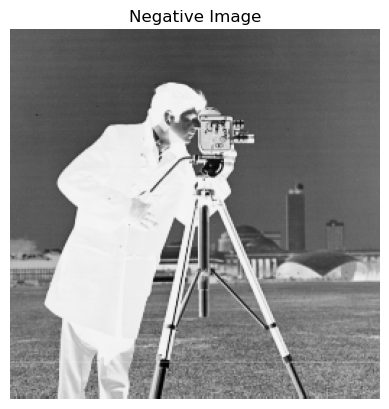

"\ncv2.imwrite('Cameraman_Negative.png', img_neg)\n\ncv2.imshow('Negative Image',img_neg)\n# Wait indefinitely for a key press (0 means wait forever)\ncv2.waitKey(0)\n# Destroy all OpenCV windows\ncv2.destroyAllWindows()\n"

In [2]:

# Image negative
img = cv2.imread(r"C:\Users\purva.nanivadekar\OneDrive - Shri Vile Parle Kelavani Mandal\AIML_DJ\Subjects\IPCV\cameraman.png")
#m,n = img.shape
L = img.max()
img_neg = L-img
plt.imshow(img_neg)
plt.title('Negative Image')
plt.axis('off')
plt.show()
'''
cv2.imwrite('Cameraman_Negative.png', img_neg)

cv2.imshow('Negative Image',img_neg)
# Wait indefinitely for a key press (0 means wait forever)
cv2.waitKey(0)
# Destroy all OpenCV windows
cv2.destroyAllWindows()
'''

Contrast Stretching
Explanation:

Expands intensity values to span full dynamic range, enhancing contrast.

For min-max stretching:

s
will be

(
r
−
r
m
i
n
)
(
r
m
a
x
−
r
m
i
n
)
×
(
L
−
1
)
s= 
(r 
max
 −r 
min
 )
(r−r 
min
 )
 ×(L−1), where 
r
m
i
n
r 
min
 , 
r
m
a
x
r 
max
  are min and max in the image.

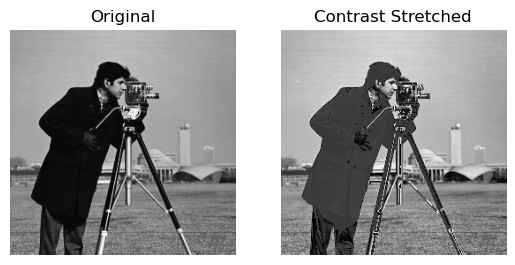

In [3]:
#r_min, r_max = np.min(img), np.max(img)
r_min, r_max= 20,220
contrast_stretch = ((img - r_min) / (r_max - r_min) * 255).astype(np.uint8)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(contrast_stretch, cmap='gray'); plt.title('Contrast Stretched'); plt.axis('off')
plt.show()

Thresholding
Explanation:

Segments an image into foreground/background by setting all pixel values above/below a threshold to one fixed value (often 0 or 255).

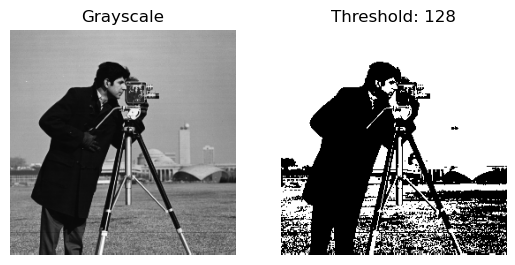

In [4]:
# Threshold value can be changed
threshold_value = 128
_, binary_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(binary_img, cmap='gray'); plt.title(f'Threshold: {threshold_value}'); plt.axis('off')
plt.show()

Gray-level Slicing
Explanation:

Highlights a specific range of intensities, useful to emphasize features obscured by the rest of the image.

Two approaches: set values in the range to max and others to zero; or, brighten range and keep rest intact.
For approach 2, substitute 0 in the code above with img to keep other areas unchanged.

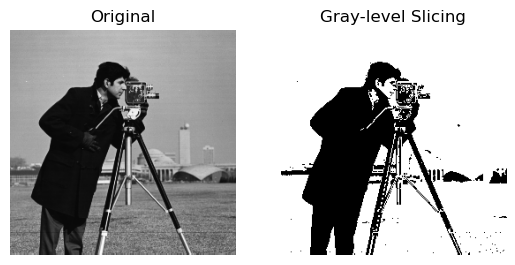

In [5]:
lower, upper = 80, 200
sliced = np.where((img >= lower) & (img <= upper), 255, 0).astype(np.uint8)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(sliced, cmap='gray'); plt.title('Gray-level Slicing'); plt.axis('off')
plt.show()

 Log Transformation, Power Law Transformation
a. Log Transformation
Explanation:

Expands dark regions, compresses bright values.

s
will be 
c
⋅
log
⁡
(
1
+
r
)
s=c⋅log(1+r), with scaling 
c
c so output lies in

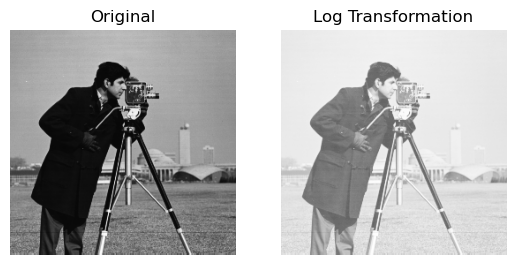

In [6]:
c = 255 / np.log(1 + np.max(img))
log_transformed = c * (np.log(img + 1))
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(log_transformed, cmap='gray'); plt.title('Log Transformation'); plt.axis('off')
plt.show()

b. Power Law (Gamma) Transformation
Explanation:

Adjusts brightness and contrast via exponentiation:

s
will be
c
⋅
r
γ
s=c⋅r 
γ
 , where 
γ
γ is the gamma value (e.g., 0.5 for brightening, >1 for darkening).

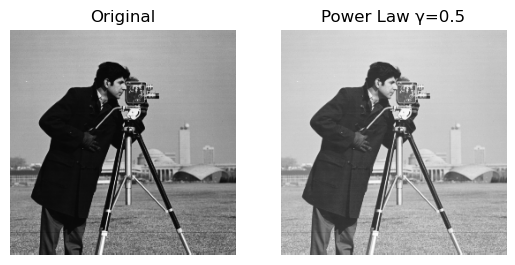

In [7]:
gamma = 0.5  # Choose between 0.1 (brighten), 1.0, 2.0 (darken), etc.
c = 255 / np.max(img)**gamma
powerlaw_img = c * (img ** gamma)
powerlaw_img = np.array(powerlaw_img, dtype=np.uint8)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(powerlaw_img, cmap='gray'); plt.title(f'Power Law γ={gamma}'); plt.axis('off')
plt.show()